In [2]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


# Actualizar los datos (URL)

url = 'https://raw.githubusercontent.com/agustin-XP/SimulacionCuaderno/master/Casos%20covid%20por%20provincias2.csv'
link='https://raw.githubusercontent.com/agustin-XP/SimulacionCuaderno/master/Casos%20covid%20por%20provincias6.csv';
df = pd.read_csv(url)

df = df.loc[0,:]

print(df)


x = list(range(1,len(df)))
y=[];
for i in range(1,len(df)):
    y.append(df.iloc[i]);


print(len(x),y)







Provincia     Azuay
16/03/2020        1
17/03/2020        5
18/03/2020        5
19/03/2020       14
20/03/2020       18
21/03/2020       19
22/03/2020       19
23/03/2020       23
24/03/2020       28
25/03/2020       31
26/03/2020       37
27/03/2020       42
28/03/2020       42
29/03/2020       53
30/03/2020       57
31/03/2020       78
01/04/2020       94
02/04/2020       99
03/04/2020       99
04/04/2020       99
05/04/2020       99
06/04/2020      100
07/04/2020      100
08/04/2020      107
09/04/2020      116
10/04/2020      151
11/04/2020      154
12/04/2020      178
13/04/2020      182
14/04/2020      192
15/04/2020      200
16/04/2020      205
17/04/2020      207
18/04/2020      217
19/04/2020      223
20/04/2020      232
21/04/2020      247
22/04/2020      273
Name: 0, dtype: object
38 [1.0, 5.0, 5.0, 14.0, 18.0, 19.0, 19.0, 23.0, 28.0, 31.0, 37.0, 42.0, 42.0, 53.0, 57.0, 78, 94, 99, 99, 99, 99, 100, 100, 107, 116, 151, 154, 178, 182, 192, 200, 205, 207, 217, 223, 232, 247, 27

In [3]:
regresion = linear_model.LinearRegression()
 
regresion.fit(np.array(x).reshape(-1, 1) ,y)
print('Coeficientes: \n', regresion.coef_)
print('Termino Independiente: \n', regresion.intercept_)


Coeficientes: 
 [7.13491629]
Termino Independiente: 
 -32.65718349928876


In [4]:
y_prediccion = regresion.predict([[7]])
print(int(y_prediccion))

17


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


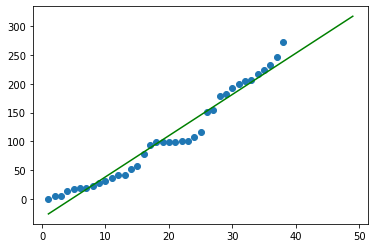

In [5]:

#Graficar
plt.scatter(x, y)
x_real = np.array(range(1, 50))
print(x_real)
plt.plot(x_real, regresion.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

In [6]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-105.56142873,   78.25070662]), array([[ 567.21118106, -190.25184495],
       [-190.25184495,   70.21167963]]))


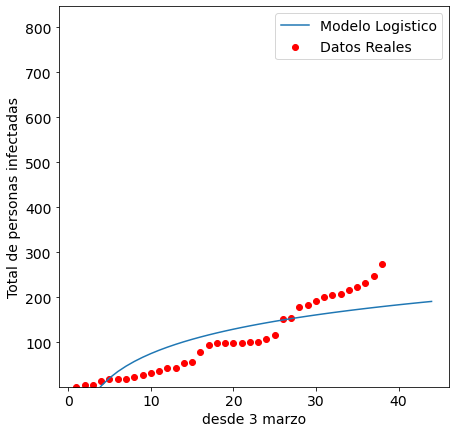

In [7]:
pred_x = list(range(min(x),max(x)+7)) # Predecir 7 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("desde 3 marzo")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

Calculos y Graficas 

(array([23.86204784,  0.06536325]), array([[ 4.93005859e+00, -6.32639646e-03],
       [-6.32639646e-03,  8.52298781e-06]]))


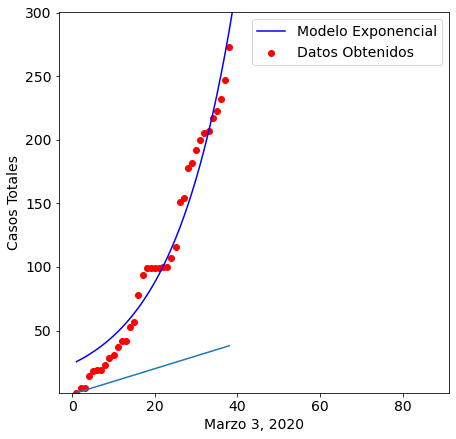

In [8]:
def ecuacion(x,a,b):
    return a*np.exp(b*x)
calculo=curve_fit(ecuacion,x,y)
print(calculo)
preduccionX= list(range(min(x),max(x)+50))


plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
plt.scatter(x,y,label="Datos Obtenidos",color="r")
plt.plot(x, x)
plt.plot(preduccionX, [ecuacion(i,calculo[0][0],calculo[0][1]) for i in preduccionX], label="Modelo Exponencial",color="b" )
plt.legend()
plt.xlabel("Marzo 3, 2020")
plt.ylabel("Casos Totales")
plt.ylim((min(y)*1,max(y)*1.1))
plt.show()

In [13]:
# Implementar Modelo Polinomail para realizar un prediccion 
df = pd.read_csv(link)

print(y1)
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25)
X_train=X_train.values.reshape([X_train.values.shape[0],1])
X_test=X_test.values.reshape([X_test.values.shape[0],1])


print(df)

0       1
1       5
2       5
3      14
4      18
5      19
6      19
7      23
8      28
9      31
10     37
11     42
12     42
13     53
14     57
15     78
16     94
17     99
18     99
19     99
20     99
21    100
22    100
23    107
24    116
25    151
26    154
27    178
28    182
29    192
30    200
31    205
32    207
33    217
34    223
35    232
36    247
37    273
Name: Azuay, dtype: int64
     Provincia  Azuay
0    16/3/2020      1
1    17/3/2020      5
2    18/3/2020      5
3    19/3/2020     14
4    20/3/2020     18
5    21/3/2020     19
6    22/3/2020     19
7    23/3/2020     23
8    24/3/2020     28
9    25/3/2020     31
10   26/3/2020     37
11   27/3/2020     42
12   28/3/2020     42
13   29/3/2020     53
14   30/3/2020     57
15   31/3/2020     78
16    1/4/2020     94
17    2/4/2020     99
18    3/4/2020     99
19    4/4/2020     99
20    5/4/2020     99
21    6/4/2020    100
22    7/4/2020    100
23    8/4/2020    107
24    9/4/2020    116
25   10/4/2020    151


# Sir

  Provincia  16/03/2020  17/03/2020  18/03/2020  19/03/2020  20/03/2020  \
0     Azuay         1.0         5.0         5.0        14.0        18.0   

   21/03/2020  22/03/2020  23/03/2020  24/03/2020  ...  13/04/2020  \
0        19.0        19.0        23.0        28.0  ...         182   

   14/04/2020  15/04/2020  16/04/2020  17/04/2020  18/04/2020  19/04/2020  \
0         192         200         205         207         217         223   

   20/04/2020  21/04/2020  22/04/2020  
0         232         247         273  

[1 rows x 39 columns]
Pais=Azuay, beta=0.00005727, gamma=0.40000000, r_0:0.00014317
Re  1.4316560757617136


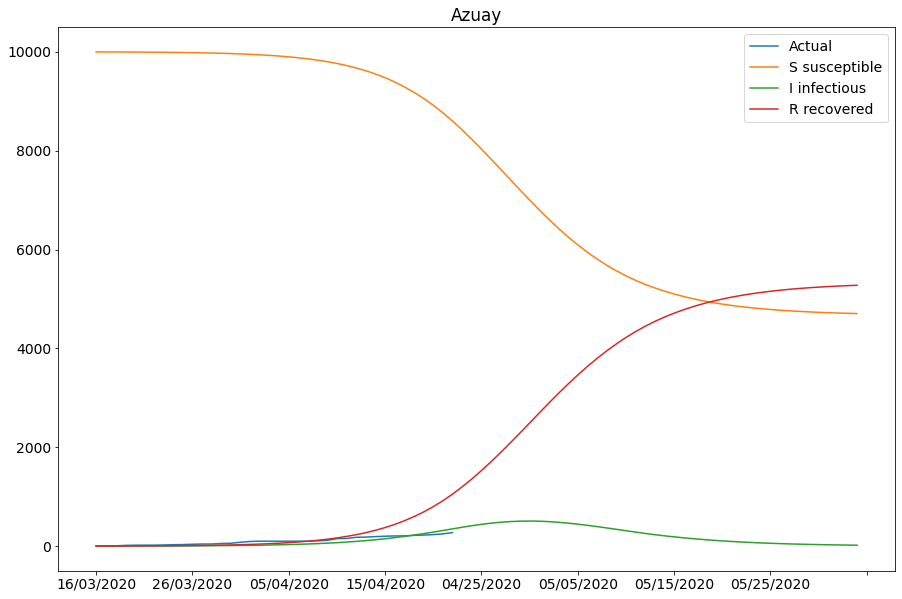

In [9]:

# Implementar y explicar la predicion del modelo SIR para el Ecuador

# 1. Implementar solo teniendo en cuenta los casos confirmados

import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime


class Learner(object):
    def __init__(self, country, loss, start_date, predict_range,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0


    def load_confirmed(self, country):
        df = pd.read_csv(url)
        country_df = df[df['Provincia'] == country]
        print(country_df)
        return country_df.iloc[0].loc['16/03/2020':]

    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime('4/22/2020', '%m/%d/%Y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%Y'))
        return values

    def predict(self, beta, gamma, data):
        predict_range = self.predict_range
        new_index = self.extend_index(data.index, predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        return new_index, extended_actual, solve_ivp(SIR, [0, size], [self.s_0,self.i_0,self.r_0], t_eval=np.arange(0, size, 1))


    def train(self):
        data = self.load_confirmed(self.country)
        
        optimal = minimize(
            loss,
            [0.001, 0.001],
            args=(data, self.s_0, self.i_0, self.r_0),
            method='L-BFGS-B',
            bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
        )
        
        beta, gamma = optimal.x
        new_index, extended_actual, prediction = self.predict(beta, gamma, data)
        
        df = pd.DataFrame({
            'Actual': extended_actual,
            'S susceptible': prediction.y[0],
            'I infectious': prediction.y[1],
            'R recovered': prediction.y[2]
        }, index=new_index)
        
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.set_title(self.country)
        df.plot(ax=ax)
    
        print(f"Pais={self.country}, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
        print("Re ",(beta/gamma)*10000)
def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0, i_0, r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))
       # l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
       # alpha = 0.1
       # return alpha * l1 + (1 - alpha) * l2


learner = Learner('Azuay', loss, '16/03/2020', 80, 10000, 1, 0)
     
learner.train()

Simulacion epidimiologica

In [ ]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 8.4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 1.4  # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


Conclusiones:

EL mojor de los modelos o simulaciones que se puede ver son las polinomica ya 
con ellas se puede tener un data mas acertado a la realidad o un dato que nos pueda dar simulaciones certeras.


Las ventajas de los modelos que nos pueden ayudar a simular escenarios para poder establecer datos del mundo real


las desventaja es que cuando no se cuenta con datos reales a sumular podremos tener datos que no sean de gran relevancia y ademas las predicciones no pueden se
